In [2]:
import japanize_matplotlib  # noqa: F401
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch

from src.optimizers.ot_osw import sinkhorn

## コスト行列の作成

In [3]:
N = 5  # アイテム数、表示数
N_ITER = 10  # 反復回数
C = torch.rand(1, N, N) * torch.arange(1, 1 + N).view(1, N, 1)
# 0-1正規化
C = C / C.max()

## X = SA(X)の更新を繰り返したときのXを可視化する

X = SA(X)という更新を繰り返したときのXを可視化する

Xは費用行列のため、XとSA(X)の大小関係は逆になる傾向があるはず
そのため、X = SA(X)の更新を繰り返しても、Xは振動して収束しないはず

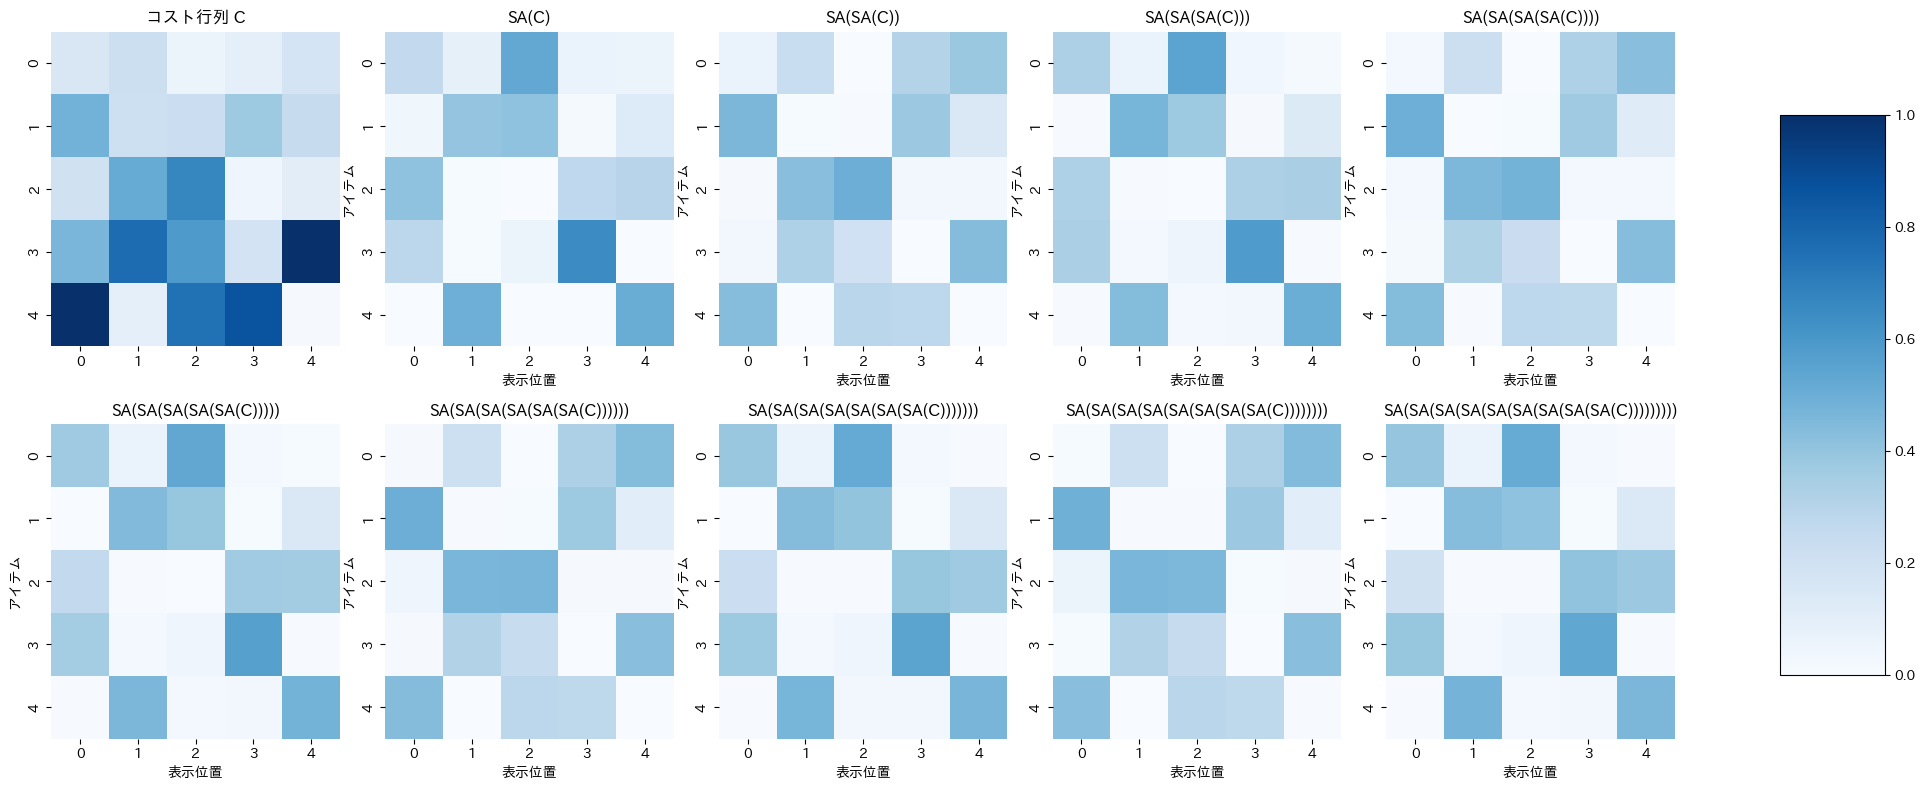

In [7]:
n_col = 5
n_row = N_ITER // n_col
if N_ITER % n_col != 0:
    n_row += 1
fig, ax = plt.subplots(n_row, n_col, figsize=(4 * n_col + 1, 4 * n_row))
ax: list[plt.Axes] = np.ravel(ax).tolist()
for iter in range(N_ITER):
    if iter == 0:
        sns.heatmap(
            C[0].numpy(),
            annot=False,
            fmt=".1f",
            cmap="Blues",
            ax=ax[0],
            vmin=0,
            vmax=1,
            cbar=False,
        )
        ax[0].set_title("コスト行列 C")
        pi = sinkhorn(C, 1, 1)
        title = "SA(C)"
    else:
        sns.heatmap(
            pi[0].numpy(),
            annot=False,
            fmt=".1f",
            cmap="Blues",
            ax=ax[iter],
            vmin=0,
            vmax=1,
            cbar=False,
        )
        ax[iter].set_title(title)
        ax[iter].set_xlabel("表示位置")
        ax[iter].set_ylabel("アイテム")
        pi = sinkhorn(pi, 1, 1)
        title = f"SA({title})"

fig.tight_layout()
# 図の右側にカラーバーを追加
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(ax[0].collections[0], cax=cbar_ax)

## ## X = SA(-X)の更新を繰り返したときのXを可視化する

更新を繰り返したときの振動を避けるため、X = SA(-X)の更新を繰り返す

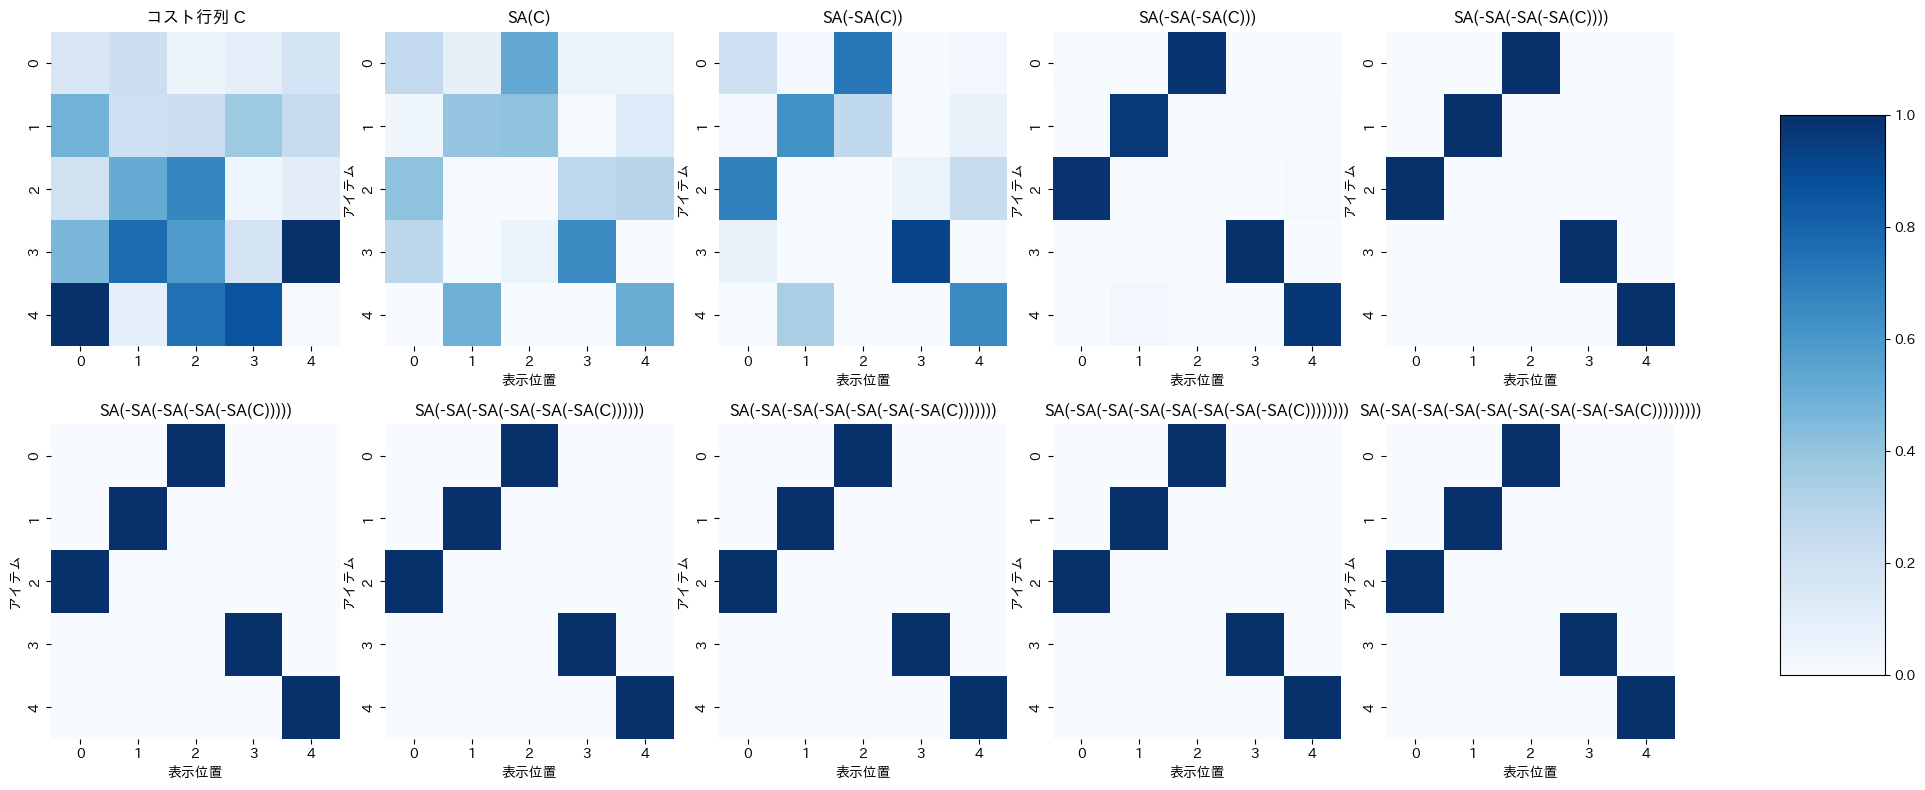

In [8]:
fig, ax = plt.subplots(n_row, n_col, figsize=(4 * n_col + 1, 4 * n_row))
ax: list[plt.Axes] = np.ravel(ax).tolist()
for iter in range(N_ITER):
    if iter == 0:
        sns.heatmap(
            C[0].numpy(),
            annot=False,
            fmt=".1f",
            cmap="Blues",
            ax=ax[0],
            vmin=0,
            vmax=1,
            cbar=False,
        )
        ax[0].set_title("コスト行列 C")
        pi = sinkhorn(C, 1, 1)
        title = "SA(C)"
    else:
        sns.heatmap(
            pi[0].numpy(),
            annot=False,
            fmt=".1f",
            cmap="Blues",
            ax=ax[iter],
            vmin=0,
            vmax=1,
            cbar=False,
        )
        ax[iter].set_title(title)
        ax[iter].set_xlabel("表示位置")
        ax[iter].set_ylabel("アイテム")
        pi = sinkhorn(-pi, 1, 1)
        title = f"SA(-{title})"

fig.tight_layout()
# 図の右側にカラーバーを追加
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(ax[0].collections[0], cax=cbar_ax)